In [1]:
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd

In [2]:
df = pd.read_csv("../logs/parser_global_task_queue.csv")
df

,Unnamed: 0,Scenario,Trial,Seed,Alpha,Beta,Gamma,Drones,Victims
0,0,GlobalTaskQueue,1,880879381715801850,0.0,0.1,0,20,113
1,1,GlobalTaskQueue,2,1726760884372734954,0.0,0.1,0,22,125
2,2,GlobalTaskQueue,3,4258223208824758363,0.0,0.1,0,19,97
3,3,GlobalTaskQueue,4,2933576904639372249,0.0,0.1,0,18,102
4,4,GlobalTaskQueue,5,1619482046725515514,0.0,0.1,0,22,117
...,...,...,...,...,...,...,...,...,...
1095,1095,GlobalTaskQueue,1096,555858737356473370,1.0,1.0,0,20,503
1096,1096,GlobalTaskQueue,1097,5692153937894976052,1.0,1.0,0,21,461
1097,1097,GlobalTaskQueue,1098,8642021537610145686,1.0,1.0,0,25,505
1098,1098,GlobalTaskQueue,1099,8533287634515682151,1.0,1.0,0,17,475


In [3]:
data = df.groupby(["Alpha", "Beta"], as_index=False).agg(Victims=("Victims", "mean"))
data["Victims"] = data["Victims"] / 1024
data

,Alpha,Beta,Victims
0,0.0,0.1,0.103125
1,0.0,0.2,0.170313
2,0.0,0.3,0.247266
3,0.0,0.4,0.304395
4,0.0,0.5,0.349707
...,...,...,...
105,1.0,0.6,0.365137
106,1.0,0.7,0.395313
107,1.0,0.8,0.424805
108,1.0,0.9,0.444727


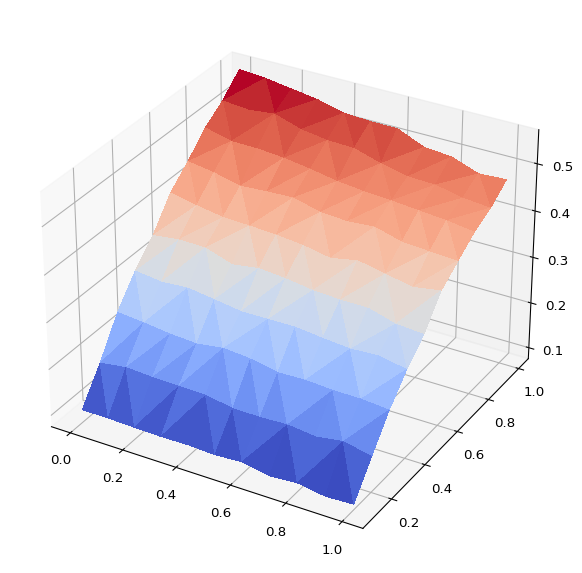

In [4]:
fig = plt.figure(figsize=(13.33,7.5), dpi = 96)
ax = plt.axes(projection='3d')
surf = ax.plot_trisurf(data["Alpha"], data["Beta"], data["Victims"], cmap=cm.coolwarm, edgecolor='none', linewidth=0, antialiased=False)

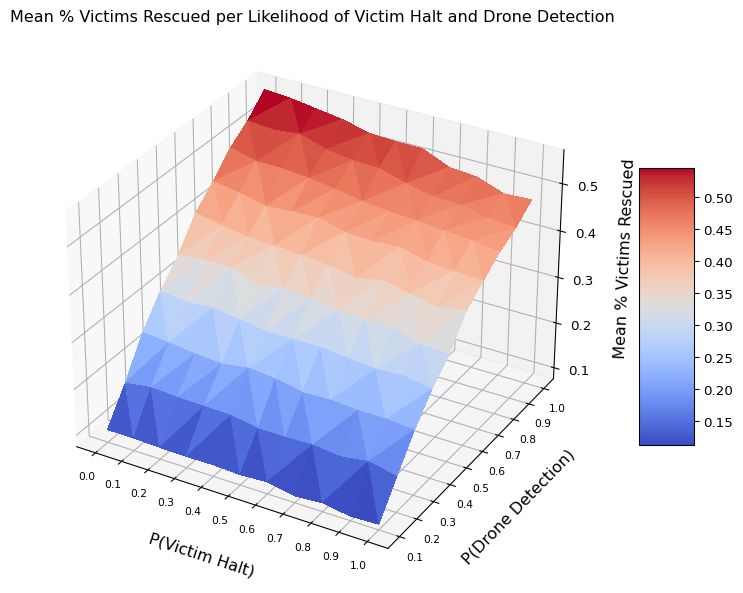

In [5]:
# Reformat x-axis label and tick labels
ax.set_xlabel("P(Victim Halt)", fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=8, labelrotation=0)
labels = ["0.0", "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]
ax.set_xticks(data["Alpha"].unique(), labels) # Map integers numbers from the series to labels list

# Reformat y-axis
ax.set_ylabel("P(Drone Detection)", fontsize=12, labelpad=10)
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=8)
ax.set_yticks(data["Beta"].unique(), labels[1:])

# Reformat z-axis
ax.set_zlabel("Mean % Victims Rescued", fontsize=12, labelpad=10)

# Format title
ax.set_title("Mean % Victims Rescued per Likelihood of Victim Halt and Drone Detection")

fig.colorbar(surf, shrink=0.5, aspect=5)

fig

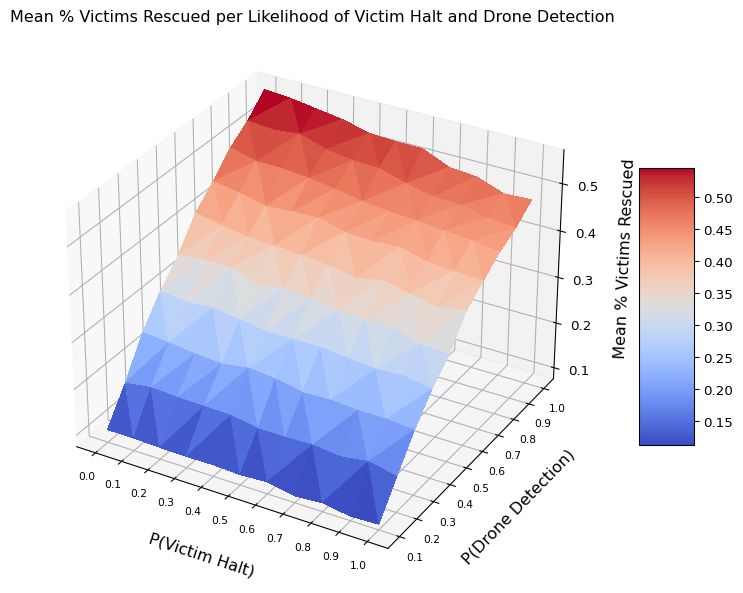

In [6]:
# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
# ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
# ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
# ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=1., z=0.1, s="Mean % Victims Rescued per Victim Halt Likelihood", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
# ax.text(x=0.12, y=1., z=.93, s="Difference in victims rescued based on relative stagnation", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
# plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
# fig.patch.set_facecolor('white')

fig

In [7]:
data["Victims"].mean()

0.33764204545454546

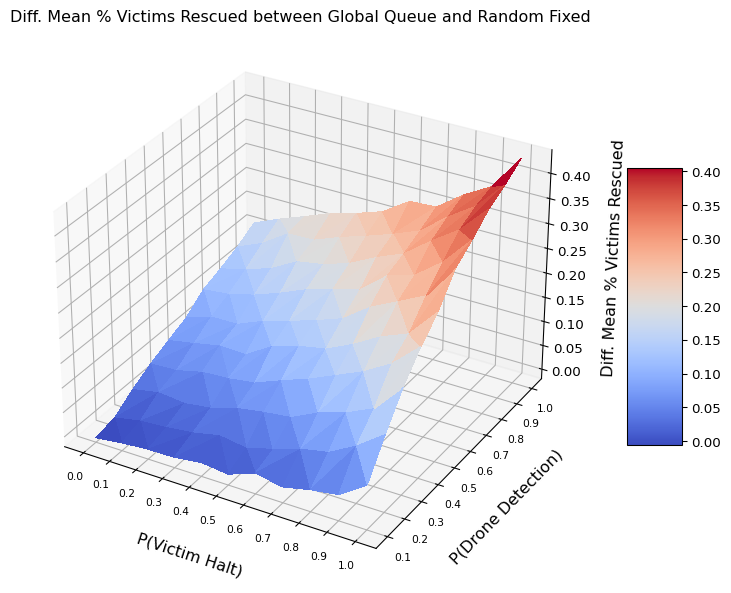

In [8]:
df = pd.read_csv("../logs/parser_random_fixed.csv")
data2 = df.groupby(["Alpha", "Beta"], as_index=False).agg(Victims=("Victims", "mean"))
data2["Victims"] = data["Victims"] - (data2["Victims"] / 1024)
data = data2

fig = plt.figure(figsize=(13.33,7.5), dpi = 96)
ax = plt.axes(projection='3d')
surf = ax.plot_trisurf(data["Alpha"], data["Beta"], data["Victims"], cmap=cm.coolwarm, edgecolor='none', linewidth=0, antialiased=False)

# Reformat x-axis label and tick labels
ax.set_xlabel("P(Victim Halt)", fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=8, labelrotation=0)
labels = ["0.0", "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]
ax.set_xticks(data["Alpha"].unique(), labels) # Map integers numbers from the series to labels list

# Reformat y-axis
ax.set_ylabel("P(Drone Detection)", fontsize=12, labelpad=10)
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=8)
ax.set_yticks(data["Beta"].unique(), labels[1:])

# Reformat z-axis
ax.set_zlabel("Diff. Mean % Victims Rescued", fontsize=12, labelpad=10)

# Format title
ax.set_title("Diff. Mean % Victims Rescued between Global Queue and Random FixedFig. 6 Diff. in Mean % Victims Rescued between Random Fixed Locations and Random Walk")

fig.colorbar(surf, shrink=0.5, aspect=5)

# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
# ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
# ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
# ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))